# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# %load_ext pycodestyle_magic

In [27]:
# %%pycodestyle


class MyKmeans: 
    
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        :init - медод инициализации начальных центроид
        """
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        
        if metric == 'euclidean':
            self.dist_function = self.distance_euclidean
        else:
            raise RuntimeError(metric) 
        
        if init == 'random':
            self.init_centroids_function = self.init_centroids_random
        elif init == 'kmeans++':
            self.init_centroids_function = self.init_centroids_kmeans_pp
        else:
            raise RuntimeError(init)
    
    def init_centroids_random(self):
        return np.random.randn(self.k, self.X.shape[1])
    
    def init_centroids_kmeans_pp(self):
        centr = np.empty((self.k, self.X.shape[1]))
        centr[0] = self.X[int(X.shape[0] * np.random.rand())].astype(float)
        
        for i in range(1, self.k):
            tmp_distances = self.dist_function(self.X, centr[:i]).min(axis=0)
            tmp_distances = np.square(tmp_distances)
            sum_distances = tmp_distances.sum()
            just_random_value = sum_distances * np.random.rand()

            
            contol_sum = 0.0
            for index, dist in enumerate(tmp_distances):
                contol_sum += dist
                # print(contol_sum, just_random_value)
                # print(dist)
                # print('\n\n\n', tmp_distances)
                if contol_sum >= just_random_value:
                    centr[i] = self.X[index]
                    break
        return centr
    
    def distance_euclidean(self, X, cent):
        distances = []
        for i in cent:
            distances.append(np.sqrt(np.square(X - i).sum(axis=1)))
        return np.array(distances).astype(float)
    
    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        ## Your Code Here
        # ...
        self.X = X
#         self.y = y
        self.centroids = self.init_centroids_function()
        
#         print(self.centroids)
        global MAGIC_ARRAY
        MAGIC_ARRAY = copy.deepcopy(self.centroids)
        
        for i in range(self.max_iter):
            self.labels = self.dist_function(X, self.centroids).argmin(axis=0)
            for i in range(self.k):
                X_cur = X[self.labels == i]
                self.centroids[i] = np.mean(X_cur, axis=0)

        self.labels = self.dist_function(X, self.centroids).argmin(axis=0)
#         print(self.centroids)
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        return self.labels

class MiniBatchKMeans(MyKmeans):
    pass

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [28]:
from sklearn.datasets import make_blobs

In [29]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

In [30]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

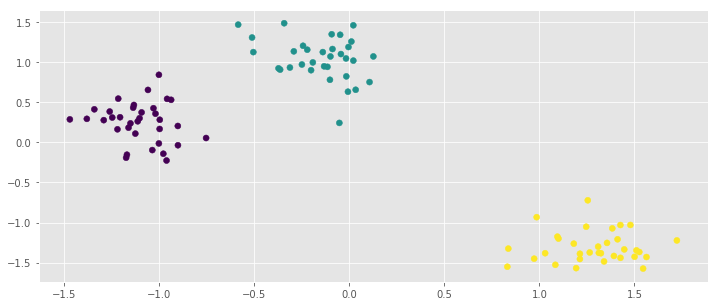

In [31]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [32]:
## Работоспособность MyKmeans

In [35]:
clf = MyKmeans(k=3, metric='euclidean' , init='random')
clf.fit(X, y)

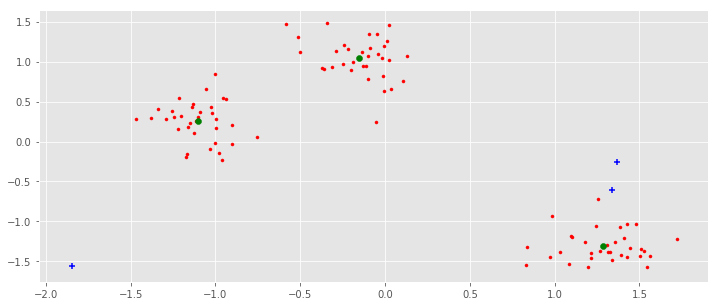

In [36]:
plt.scatter(X[:,0], X[:, 1], marker='.', c='r')
plt.scatter(clf.centroids[:,0], clf.centroids[:, 1], marker='o', c='g')
plt.scatter(MAGIC_ARRAY[:,0], MAGIC_ARRAY[:, 1], marker='+', c='b')

In [37]:
print(clf.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [38]:
## Работоспособность MyKmeans++

In [48]:
clf_kpp = MyKmeans(k=3, metric='euclidean' , init='kmeans++')
clf_kpp.fit(X, y)

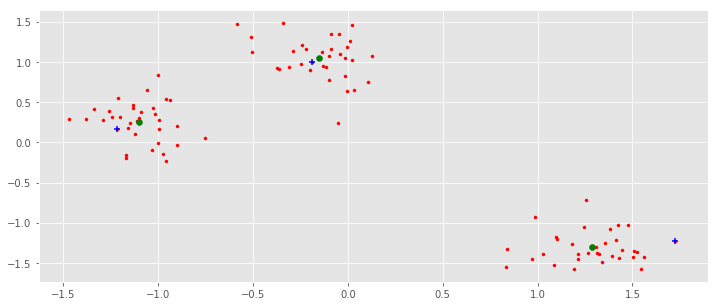

In [49]:
plt.scatter(X[:,0], X[:, 1], marker='.', c='r')
plt.scatter(clf_kpp.centroids[:,0], clf_kpp.centroids[:, 1], marker='o', c='g')
plt.scatter(MAGIC_ARRAY[:,0], MAGIC_ARRAY[:, 1], marker='+', c='b')

In [50]:
print(clf_kpp.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [51]:
## Работоспособность MyKmeans с MiniBatchMyKmeans

In [52]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans

In [44]:
## Время выполнения алгоритма Kmeans из sklearn

In [75]:
%%time
clf_kpp = KMeans(n_clusters=3)
clf_kpp.fit(X, y)

CPU times: user 17.2 ms, sys: 2.36 ms, total: 19.6 ms
Wall time: 18.2 ms


In [76]:
## Время выполнения алгоритма MyKmeans

In [77]:
%%time
my_clf_kpp = MyKmeans(k=3)
my_clf_kpp.fit(X, y)

CPU times: user 139 ms, sys: 5.87 ms, total: 145 ms
Wall time: 145 ms


In [ ]:
## Время выполнения алгоритма MyKmeans++

In [ ]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans

In [ ]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [ ]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [ ]:
## MyKMeans

In [ ]:
## MyKMeans++

In [ ]:
## MyKMeans с MiniBatchMyKMeans

In [ ]:
## MyKMeans++ с MiniBatchMyKMeans

In [ ]:
## Вывод